# First try

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n_assets = 10  # dimension of x-vector
n_periods = 13  # 1 ... T, T - n_periods

In [4]:
mean = 0  # like in paper
var = 0.1  # like in paper

return_matrix = np.ones((n_periods, n_assets)) + np.random.normal(loc = mean, scale = var, size = (n_periods, n_assets))
assert(return_matrix.shape == (n_periods, n_assets))
assert(len(return_matrix[:, 0]) == n_periods)
assert(len(return_matrix[0, :]) == n_assets)

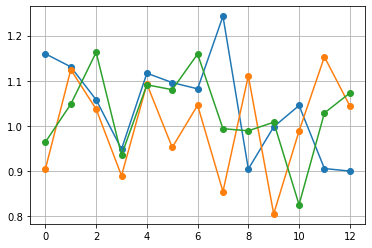

In [5]:
assets = [0, 1, 2]
for ass in assets:
    plt.plot(return_matrix[:, ass], marker = 'o')
plt.grid()

In [6]:
a = np.zeros(10)
a[3] = 1
a

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [7]:
counter = 0
for k in range(100):
    counter += 1
    if k == 50:
        break
print(counter)

51


In [10]:
x = np.zeros(n_assets)
x.shape[0]

10

In [ ]:
def compute_gradient(x, return_matrix):
    n_periods = return_matrix.shape[0]
    n_assets = return_matrix.shape[1]
    x_size = x.shape[0]
    

    

def frank_wolfe(return_matrix, n_iterations):
    n_periods = return_matrix.shape[0]
    n_assets = return_matrix.shape[1]
    
    # Our solution is a vector x, |x| = n_assets - 
    # investment distribution
    # We pick initial approximation for x - any
    # simplex vertex
    vertex_to_start = 1
    assert vertex_to_start < n_assets, print('Pick another initial approximation')
    x = np.zeros(n_assets)
    x[vertex_to_start] = 1  # initial approximation - all money to one asset

    for k in range(1, n_iterations):
        # Compute gradient of objective function
        grad_vector = compute_gradient(x, return_matrix)
        # FW for simplex problem --> minimum of linear
        # function will be reached on the vertex of the simplex
        min_index = find_min_component_index(grad_vector)
        
        # x_k^ = e_ik from lectures - direction where to go
        xk_hat = np.zeros()
        xk_hat[min_index] = 1

        if satisfies(xk_hat):
            break
        else:
            learning_rate = 2 / (k + 1)
            x = x + learning_rate * (xk_hat - x)
    print()
    return x

In [ ]:
investment_distribution = frank_wolfe(
    return_matrix = return_matrix,
    n_iterations = 100
)